In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Amazon Sale Report.csv',low_memory=False)
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [47]:
df = df.dropna(subset=['currency'])
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         5136
Qty                       0
currency                  0
Amount                    0
ship-city                31
ship-state               31
ship-postal-code         31
ship-country             31
promotion-ids         41698
B2B                       0
fulfilled-by          83639
Unnamed: 22           46060
dtype: int64

In [48]:
df.duplicated().sum()

0

In [49]:
df.shape

(121180, 24)

In [50]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [51]:
df['Category'].value_counts()

Category
Set              47042
kurta            46717
Western Dress    14704
Top              10165
Ethnic Dress      1093
Blouse             881
Bottom             420
Saree              155
Dupatta              3
Name: count, dtype: int64

# we can say that the most ordered product is set and kurta

In [52]:
df['Status'].value_counts()

Status
Shipped                          77596
Shipped - Delivered to Buyer     28761
Cancelled                        10766
Shipped - Returned to Seller      1950
Shipped - Picked Up                973
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

# there are 18332 orders have been cancled and some were returned to seller

[]

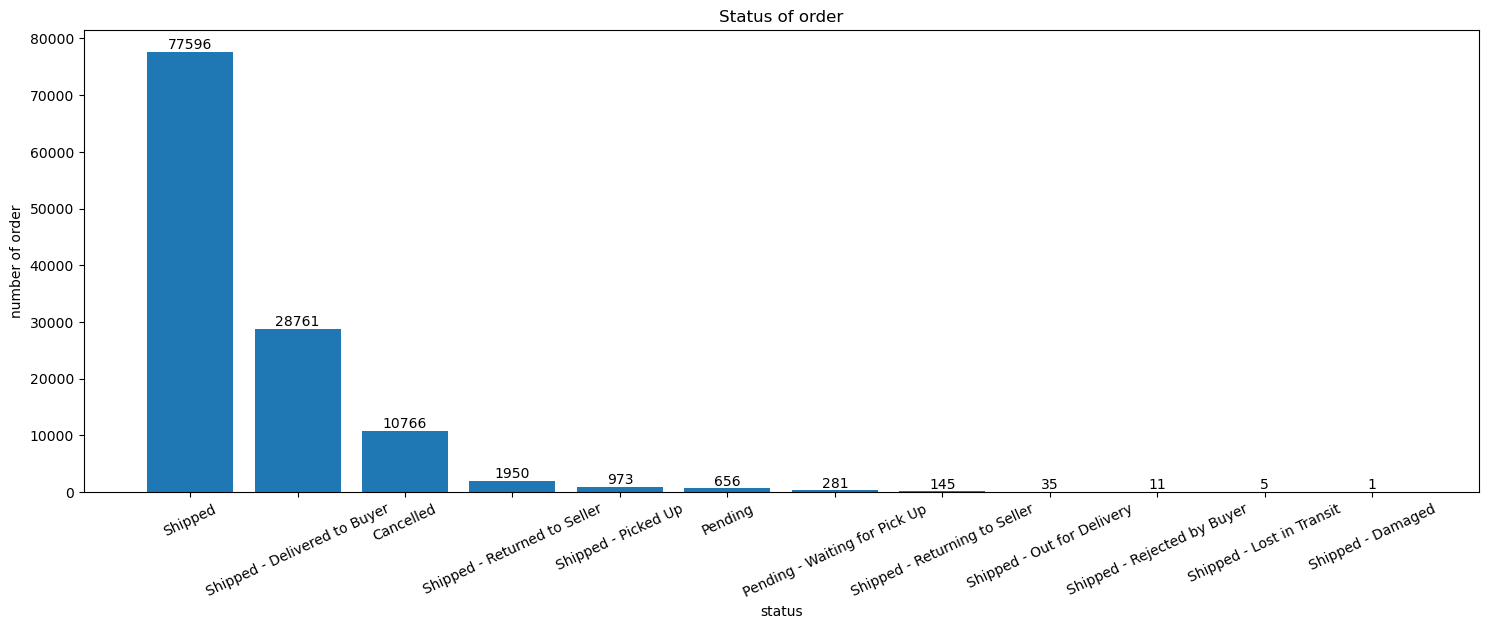

In [60]:
count_values=df['Status'].value_counts()
plt.figure(figsize=(18,6))
bar=plt.bar(count_values.index,count_values.values)
plt.title('Status of order')
plt.xlabel('status')
plt.ylabel('number of order')
plt.bar_label(bar)
plt.xticks(rotation=25)
plt.plot()

In [55]:
df['ship-country'].value_counts()

ship-country
IN    121149
Name: count, dtype: int64

# it's a report of only one country i.e, India

[]

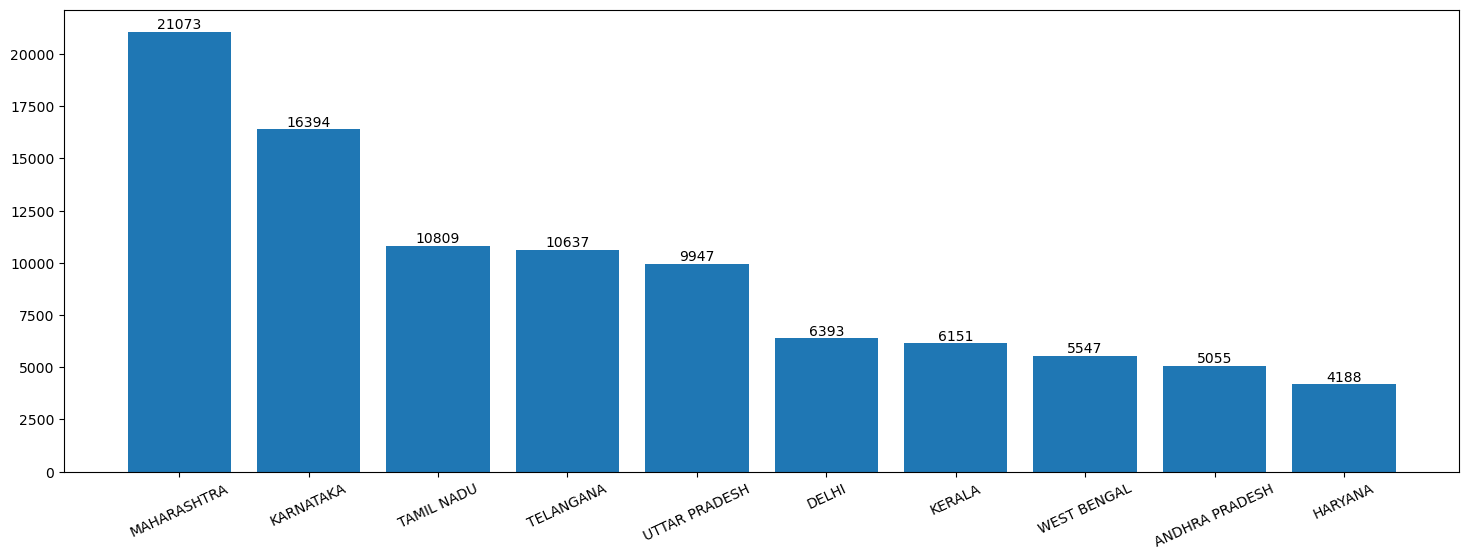

In [56]:
count_values=df['ship-state'].value_counts()[0:10]
plt.figure(figsize=(18,6))
bar=plt.bar(count_values.index,count_values.values)
plt.bar_label(bar)
plt.xticks(rotation=25)
plt.plot()

# here are top 10 state in India to order products

In [69]:
df_cancel=df[df['Status'] == 'Cancelled']
count_values=df_cancel['ship-state'].value_counts()[0:10]

[]

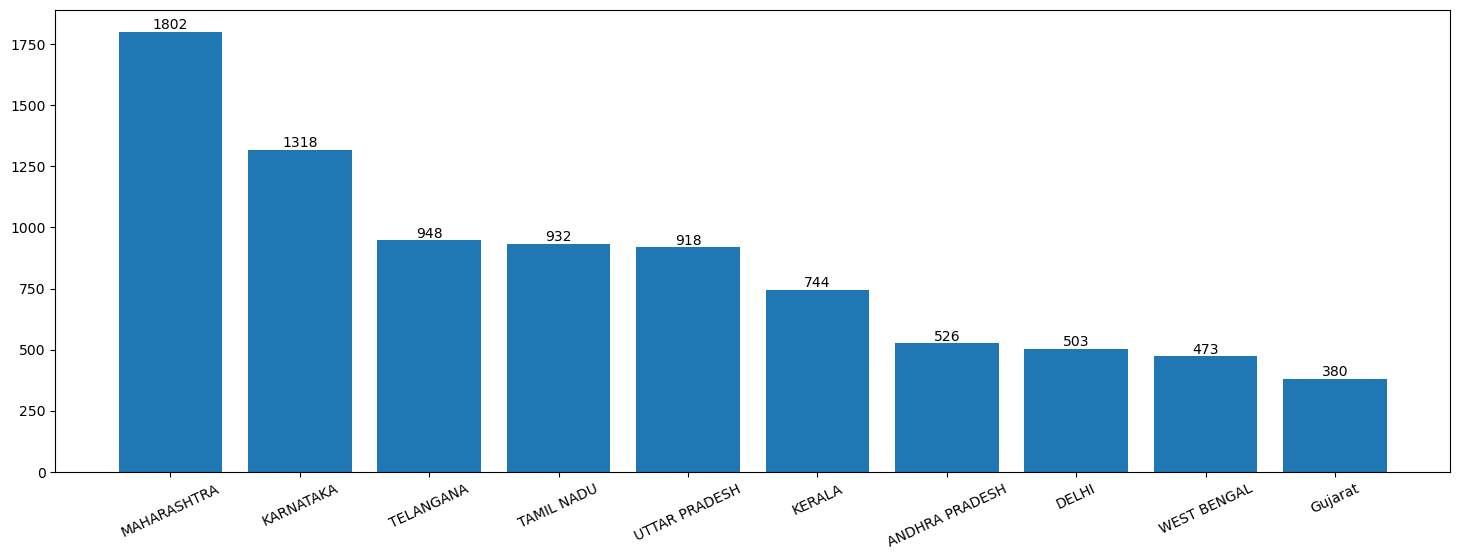

In [70]:
plt.figure(figsize=(18,6))
bar=plt.bar(count_values.index,count_values.values)
plt.bar_label(bar)
plt.xticks(rotation=25)
plt.plot()

# here are top states to cancel the product

In [74]:
df_cancel=df[df['Status'] == 'Cancelled']
count_values=df_cancel['Category'].value_counts()

[]

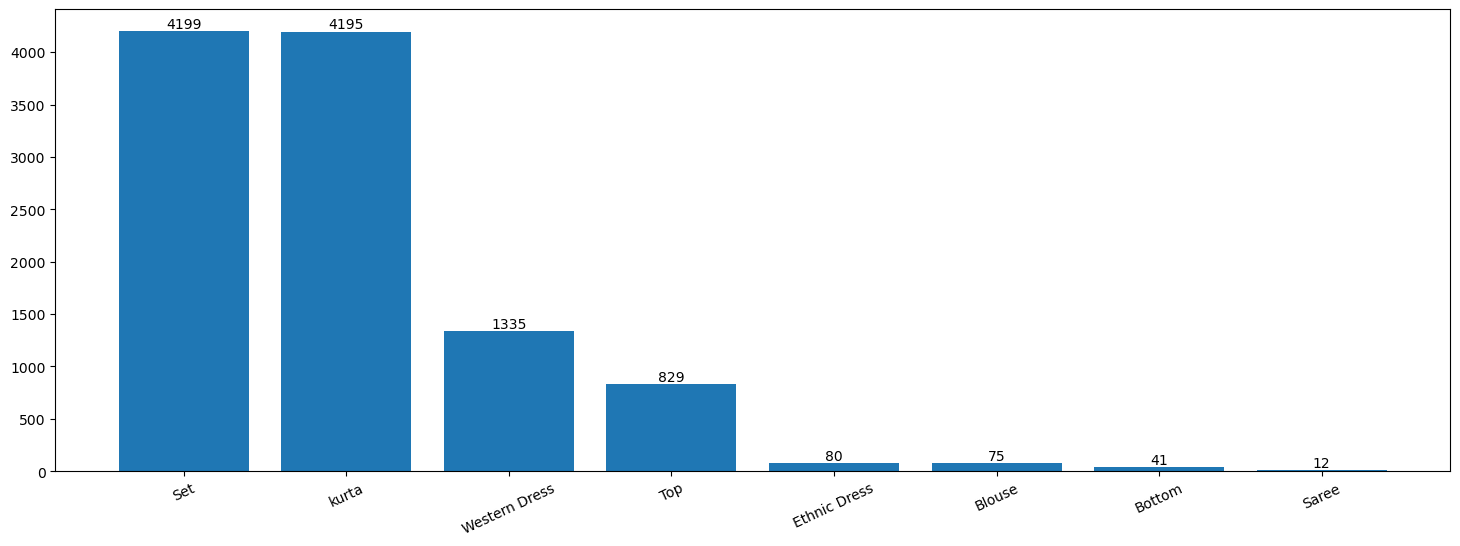

In [75]:
plt.figure(figsize=(18,6))
bar=plt.bar(count_values.index,count_values.values)
plt.bar_label(bar)
plt.xticks(rotation=25)
plt.plot()